In [1]:
from IPython.display import Image

# 10. 회귀 분석으로 연속적 타깃 변수 예측
* 데이터 탐색과 시각화
* 선형 회귀 모델을 구현하는 여러 방법
* 이상치에 민감하지 않은 회귀 모델 훈련
* 회귀 모델을 평가하고 문제점 분석
* 비선형 데이터에 회귀 모델 학습

# 10.1 선형 회귀
* 하나 이상의 특성과 연속적 타깃 변수 사이의 관계를 모델링
* 범주형 클래스 레이블이 아닌 연속적인 출력값을 예측

### 10.1.1 단순 선형 회귀
* 하나의 특성(설명 변수, x)와 연속적인 타깃(응답 변수, y) 사이의 관계 모델링

$$y = w_0 + w_{1}x$$

* $w_0$ : y 축 절편
* $w_1$ : 특성의 가중치
* 특성과 타깃 사이의 관계를 나타내는 선형 방정식의 가중치를 학습


In [2]:
# 선형 회귀
Image(url='https://git.io/Jts3N', width=500) 

* 회귀 직선 : 데이터에 가장 잘 맞는 직선
* 오프셋 또는 예측 오차(잔차) : 회귀 직선과 훈련 샘플 사이의 직선 거리


### 10.1.2 다중 선형 회귀
* 여러 개의 특성이 있는 경우


In [3]:
Image(url='https://git.io/Jts3p', width=500) 

# 10.2 주택 데이터셋 탐색

Attributes:
    
<pre>
1. CRIM      도시의 인당 범죄율
2. ZN        2만 5,000평방 피트가 넘는 주택 비율
3. INDUS     도시에서 소매 업종이 아닌 지역 비율
4. CHAS      찰스 강 인접 여부(강 주변=1, 그 외=0)
5. NOX       일산화질소 농도(10ppm당)
6. RM        주택의 평균 방 개수
7. AGE       1940년 이전에 지어진 자가 주택 비율
8. DIS       다섯 개의 보스턴 고용 센터까지 가중치가 적용된 거리
9. RAD       방사형으로 뻗은 고속도로까지 접근성 지수
10. TAX      10만 달러당 재산세율
11. PTRATIO  도시의 학생-교사 비율
12. B        1000(Bk - 0.63)^2, 여기서 Bk는 도시의 아프리카계 미국인 비율
13. LSTAT    저소득 계층의 비율
14. MEDV     자가 주택의 중간 가격(1,000달러 단위)
</pre>

* 주택 가격(MEDV) - 타깃값

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/drive/MyDrive/머신러닝 교과서 with 파이썬, 사이킷런, 텐서플로/data/housing.data.txt', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### 10.2.2 데이터셋의 중요 특징 시각화
* 탐색적 데이터 분석(Exploratory Data Analysis, EDA)
    * 머신 러닝 모델을 훈련하기 전에 첫 번째로 수행할 중요하고 권장되는 단계
    * 이상치를 감지하고 데이터 분포를 시각화하거나 특성 간의 관계를 나타내는데 도움이 된다.

In [6]:
# 산점도 행렬을 그리기 위한 라이브러리
!pip install --upgrade mlxtend

In [7]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

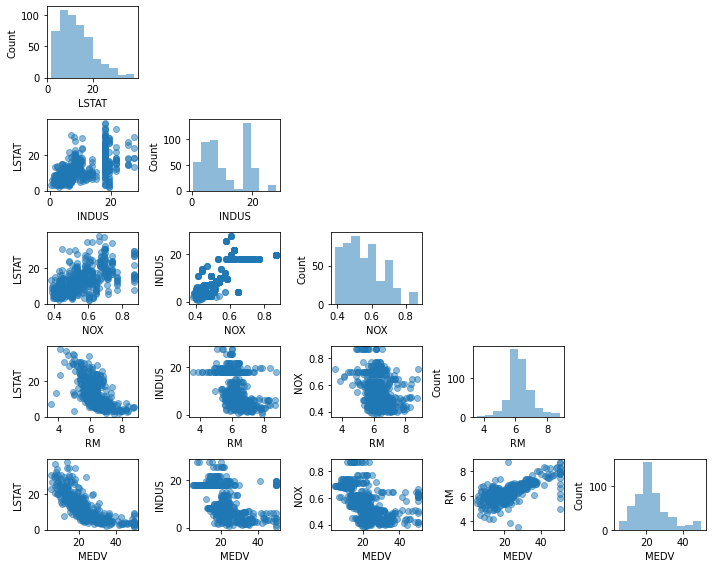

In [8]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10, 8), names=cols, alpha=0.5)

plt.tight_layout()
plt.show()

### 10.2.3 상관관계 행렬을 사용한 분석
* 변수 간의 선형 관계 정량화
* 피어슨 상관관계 계수를 포함하고 있는 정방 행렬
    * 피어슨 상관관계 계수 = r 
        * 특성 사이의 선형 의존성을 측정
        * -1 ~ 1 사이의 값
        * r=1 : 두 특성이 완벽한 양의 상관관계
        * r=0 : 아무런 상관관계 없음
        * r=-1 : 완벽한 음의 상관관계
        

In [9]:
from mlxtend.plotting import heatmap
import numpy as np

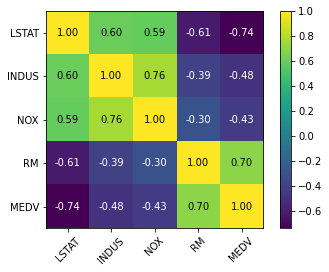

In [10]:
# 넘파이 corrcoef 함수
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

* LSTAT과 MEDV : 상관계수 -0.74로 꽤 강한 음의 상관관계. 산점도 행렬에서는 비선형 관계.
* RM과 MEDV : 상관계수가 0.7로 꽤 강한 양의 상관관계. 산점도 행렬에서는 선형 관계.


# 10.3 최소 제곱 선형 회귀 모델 구현
* 훈련 샘플까지 수직 거리(잔차 또는 오차)의 제고합을 최소화

In [11]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [12]:
X = df[['RM']].values
y = df['MEDV'].values

In [13]:
print(X[:10]) 

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]]


In [14]:
print(y[:10])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [15]:
X.shape, y.shape # 2차원, 1차원

((506, 1), (506,))

In [16]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
# 사이킷런 대부분의 변환기는 데이터가 2차원 배열로 받는다. np.newaxis를 사용하여 배열에 새로운 차원 추가. 
# 이후 다시 flatten()을 사용해 1차원 배열로 만든다.
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten() 

In [17]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

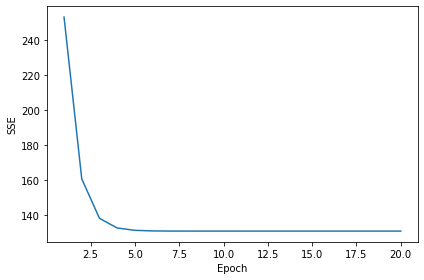

In [18]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

* 경사 하강법 알고리즘은 다섯 번재 에폭에서 수렴했다.

In [19]:
# 훈련 샘플의 산점도와 회귀 직선
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

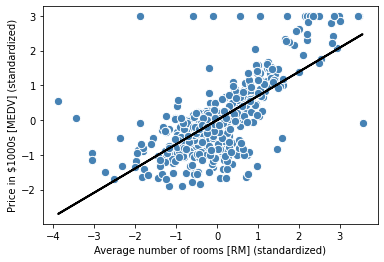

In [20]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [21]:
print('기울기: %.3f' % lr.w_[1])
print('절편: %.3f' % lr.w_[0])

기울기: 0.695
절편: -0.000


방 개수가 주택 가격을 잘 설명하지 못하는 경우도 많다. 특히 y=3인 직선에 여러 데이터 포인트가 늘어서 있다. 이 지점에서 초과되는 가격을 잘라낸 것이다.

In [22]:
# 예측 가격을 원래 단위 가격으로 되돌리러면 StandardScaler의 inverse_transform 메서드 호출
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("$1,000 단위 가격: %.3f" % sc_y.inverse_transform(price_std.reshape(-1,1)))

$1,000 단위 가격: 10.840


### 10.3.2 사이킷런으로 회귀 모델의 가중치 추정



In [23]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y) # 사이킷런 선형 회귀 구현은 표준화되지 않은 특성에도 (더) 잘 동작한다.
y_pred = slr.predict(X)
print('기울기: %.3f' % slr.coef_[0]) # 특성을 표준화하기 않았기 때문에 위 가중치와 절편과 값이 다르다.
print('절편: %.3f' % slr.intercept_)

기울기: 9.102
절편: -34.671


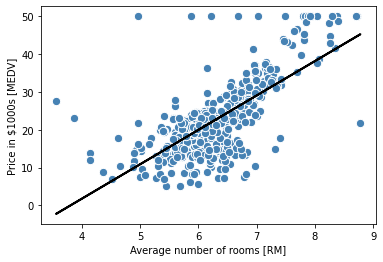

In [24]:
lin_regplot(X, y, slr) # 그래프를 보면 대체적인 모습이 동일.
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

* 선형 회귀 푸는 해석적 방법

$$w=(X^{T}X)^{-1}X^{T}y$$

In [25]:
# 1로 채워진 열 벡터 추가
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb)) # (X^T * X)^-1
w = np.dot(z, np.dot(Xb.T, y)) # (X^T * X)^-1 * (X^T * y)

print('기울기: %.3f' % w[1])
print('절편: %.3f' % w[0])

기울기: 9.102
절편: -34.671


* QR 분해
    * 실수 행렬을 직교 행렬(orthogonal matrix) $\boldsymbol{Q}$와 상삼각 행렬(upper triangular matrix) $\boldsymbol{R}$의 곱으로 표현하는 행렬 분해 방법
    * 직교 행렬은 전치 행렬과 역행렬이 같다. 
        * 선형 회귀 공식을 $\boldsymbol{w}$에 정리하면 아래와 같이 쓸 수 있다.

$\boldsymbol{w} = \boldsymbol{X}^{-1}\boldsymbol{y} 
= (\boldsymbol{Q}\boldsymbol{R})^{-1}\boldsymbol{y}
= \boldsymbol{R}^{-1}\boldsymbol{Q}^{-1}\boldsymbol{y}
= \boldsymbol{R}^{-1}\boldsymbol{Q}^T\boldsymbol{y}
$

`np.linalg.qr()` 함수를 사용하여 QR 분해를 수행한 다음 `np.linalg.inv()` 함수를 사용해 상삼각 행렬의 역행렬을 구하여 계산할 수 있다.

In [26]:
Q, R = np.linalg.qr(Xb)
w = np.dot(np.linalg.inv(R), np.dot(Q.T, y))

print('기울기: %.3f' % w[1])
print('절편: %.3f' % w[0])

기울기: 9.102
절편: -34.671


`LinearRegression` 클래스가 사용하는 `scipy.linalg.lstsq` 함수는 $\boldsymbol{X}$의 유사역행렬(pseudo-inverse matrix) $\boldsymbol{X}^+$을 구하여 아래처럼 바로 해를 구한다.

$\boldsymbol{w} = \boldsymbol{X}^+\boldsymbol{y}$

유사역행렬은 특잇값 분해(SVD)로 얻은 $\boldsymbol{U}$, $\boldsymbol{\Sigma}$, $\boldsymbol{U}$로 계산한다.

$\boldsymbol{X}^+ = \boldsymbol{V}\boldsymbol{\Sigma}^+\boldsymbol{U}^T$

여기에서 $\boldsymbol{\Sigma}^+$는 $\boldsymbol{\Sigma}$ 원소의 역수를 취하고 어떤 임곗값보다 작은 값은 0으로 만들어 얻을 수 있다. 예를 들어 $\boldsymbol{\Sigma}$의 행마다 가장 큰 값을 골라 $1 \times 10^{-15}$를 곱한 다음 이보다 작은 원소를 0으로 만든다. 넘파이 `np.linalg.pinv()` 함수를 사용하면 이런 작업을 모두 알아서 처리해 주므로 $\boldsymbol{X}^+$를 손쉽게 얻을 수 있다.

In [27]:
w = np.dot(np.linalg.pinv(Xb), y)

print('기울기: %.3f' % w[1])
print('절편: %.3f' % w[0])

기울기: 9.102
절편: -34.671
